##1. a) Define the question

1: Predict how many goals the home team scores.

2: Predict how many goals the away team scores.


 




### b) Metric for success
by using logistic regression, home score and away scores will be predicted

### c) The Context

Mchezopesa Ltd will be able to do the prediction of the home tem goals and away team goals

### d) Experimental design taken
- Loading the libraries

- Loading the dataset

- Previewing the dataset

- Cleaning the dataset

- Univariate Analysis

- Bivariate Analysis

- Multivariate Analysis

- Perform any necessary feature engineering

- Check of multicollinearity

- Start building the model

- Cross-validate the model

- Compute RMSE

- Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

- Perform appropriate regressions on the data including your justification

- Challenge your solution by providing insights on how you can make improvements.

### e) Appropriateness of the available data to answer the given question

the following features in the fifa_ranking dataset will enable us do the prediction:

- Rank
- Country Abbreviation
- Total Points
- Previous Points
- Rank Change
- Average Previous Years Points
- Average Previous Years Points Weighted (50%)
- Average 2 Years Ago Points
- Average 2 Years Ago Points Weighted (30%)
- Average 3 Years Ago Points
- Average 3 Years Ago Points Weighted (20%)
- Confederation
- Date - date of the match
- Home_team - the name of the home team
- Away_team - the name of the away team
- Home_score - full-time home team score including extra time, not - - including penalty-shootouts
- Away_score - full-time away team score including extra time, not - - including penalty-shootouts
- Tournament - the name of the tournament
- City - the name of the city/town/administrative unit where the - - - match was played
- Country - the name of the country where the match was played
- Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

##2. Importing Necessary libraries 

In [500]:
#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt

#importing sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import LabelEncoder
#importing sklearn.model_selection
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

#importing sklearn.metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

#importing sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
#importing seaborn
import seaborn as sns

#importing scipy
import scipy.stats as stats
import scipy as sp


## 3.Loading The Dataset

In [501]:
#Loading the datasets

#fifa_ranking dataset
fifa_ranking = pd.read_csv("/content/fifa_ranking.csv")

#Results dataset
results = pd.read_csv("/content/results.csv")

##4. Previewing the Data

In [502]:
# Determining the no. of records in our dataset
#Shape of fifa_ranking
fifa_ranking.shape

(57793, 16)

fifa_ranking dataset has 57793 rows and 16 columns

In [503]:
#Shape of results
results.shape

(40839, 9)

results dataset has 40839 rows and 9 columns

In [504]:
# Previewing the top of our dataset
fifa_ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.000,57,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
1,2,Italy,ITA,0.000,57,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
2,3,Switzerland,SUI,0.000,50,9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
3,4,Sweden,SWE,0.000,55,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
4,5,Argentina,ARG,0.000,51,5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08


In [505]:
results.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


In [506]:
# Previewing the bottom of our dataset
fifa_ranking.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,2018-06-07
57791,206,Somalia,SOM,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,2018-06-07
57792,206,Tonga,TGA,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,OFC,2018-06-07


In [507]:
results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [508]:
#Columns in  Fifa_dataset
fifa_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [509]:
#columns in results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [510]:
#information of the datasets

#fifa_ranking dataset information
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [511]:
#results information
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [512]:
#Datasets' description

#description of fifa_ranking
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000,57793.000
mean,101.628,122.069,332.303,-0.010,61.799,61.799,61.005,30.502,59.777,17.933,59.174,11.835
std,58.618,260.427,302.873,5.804,138.015,138.015,137.688,68.844,136.296,40.889,135.533,27.107
min,1.000,0.000,0.000,-72.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,51.000,0.000,56.000,-2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,101.000,0.000,272.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,152.000,92.790,525.000,1.000,32.250,32.250,26.660,13.330,21.500,6.450,21.250,4.250
max,209.000,1775.030,1920.000,92.000,1158.660,1158.660,1169.570,584.790,1159.710,347.910,1200.770,240.150


In [513]:
#description of results
results.describe()

,home_score,away_score
count,40839.000,40839.000
mean,1.746,1.188
std,1.749,1.405
min,0.000,0.000
25%,1.000,0.000
50%,1.000,1.000
75%,2.000,2.000
max,31.000,21.000


## 5.Combining the Datasets

In [514]:
#creating hometeam and away team datasets
#home team data
home_df = results[['home_team','date']]
#away team data
away_df = results[['away_team','date']]




In [515]:
#Renaminng fifa_ranking for merging with home team data
home_rank = fifa_ranking.rename(columns={'rank':'rank_home', 'country_full':'home_team', 'total_points':'home_total_points',
       'previous_points':'home_previous_points', 'rank_change':'home_rank_change', 'cur_year_avg':'home_cur_year_avg',
       'cur_year_avg_weighted':'home_cur_year_avg_weighted', 'last_year_avg':'home_last_year_avg', 'last_year_avg_weighted':'home_last_year_avg_weighted',
       'two_year_ago_avg':'home_two_year_ago_avg', 'two_year_ago_weighted':'home_two_year_ago_weighted', 'three_year_ago_avg':'home_three_year_ago_avg',
       'three_year_ago_weighted':'home_three_year_ago_weighted', 'rank_date':'date'})

In [516]:
#Renaminng fifa_ranking for merging with away team data
away_rank = fifa_ranking.rename(columns={'rank':'away_rank', 'country_full':'away_team', 'total_points':'away_total_points',
       'previous_points':'away_previous_points', 'rank_change': 'away_rank_change', 'cur_year_avg':'away_cur_year_avg',
       'cur_year_avg_weighted':'away_cur_year_avg_weighted', 'last_year_avg':'away_last_year_avg', 'last_year_avg_weighted':'away_last_year_avg_weighted',
       'two_year_ago_avg':'away_two_year_ago_avg', 'two_year_ago_weighted':'away_two_year_ago_weighted', 'three_year_ago_avg':'away_three_year_ago_avg',
       'three_year_ago_weighted':'away_three_year_ago_weighted', 'rank_date':'date'})

In [517]:
#merging rankings of home_df and home_rank using inner join method
home_team = pd.merge(home_df, home_rank, on=['date', 'home_team'], how='inner')

#merging rankings of away_df and away_rank using inner join method
away_team = pd.merge(away_df, away_rank, on=['date', 'away_team'], how='inner')

In [518]:
#dropping unnecessary columns

#dropping columns for home team
home_team.drop(columns=['country_abrv', 'confederation'],axis=1 , inplace=True)

#dropping columns for away team
away_team.drop(columns=['country_abrv', 'confederation'],axis=1 , inplace=True)

country abbreviation have been dropped since we have country column and confederation it will not be used in our analysis

In [519]:
#merging hometeam and away team to results dataset and renaming the dataframe as fifa
fifa = pd.merge(results, home_team, on=['date', 'home_team'], how='inner')
fifa = pd.merge(fifa, away_team, on=['date', 'away_team'], how='inner')

In [520]:
#previewing fifa columns
fifa.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_home',
       'home_total_points', 'home_previous_points', 'home_rank_change',
       'home_cur_year_avg', 'home_cur_year_avg_weighted', 'home_last_year_avg',
       'home_last_year_avg_weighted', 'home_two_year_ago_avg',
       'home_two_year_ago_weighted', 'home_three_year_ago_avg',
       'home_three_year_ago_weighted', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change', 'away_cur_year_avg',
       'away_cur_year_avg_weighted', 'away_last_year_avg',
       'away_last_year_avg_weighted', 'away_two_year_ago_avg',
       'away_two_year_ago_weighted', 'away_three_year_ago_avg',
       'away_three_year_ago_weighted'],
      dtype='object')

In [521]:
#dropping columns
fifa = fifa.drop(columns=['city', 'country', 'tournament'])

city and country have been dropped since we have away_team and home_team. 
tournament have been droppwd since it is not necessary for our prediction

In [522]:
#previewing the first five rows of fifa dataset
fifa.head(5)

,date,home_team,away_team,home_score,away_score,neutral,rank_home,home_total_points,home_previous_points,home_rank_change,...,away_previous_points,away_rank_change,away_cur_year_avg,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted
0,1993-08-08,Bolivia,Uruguay,3,1,False,59,0.000,13,28,...,47,-6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1993-08-08,Brazil,Mexico,1,1,False,8,0.000,55,-5,...,42,11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1993-08-08,Ecuador,Venezuela,5,0,False,35,0.000,23,30,...,4,31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1993-08-08,Guinea,Sierra Leone,1,0,False,65,0.000,23,-2,...,16,-7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1993-08-08,Paraguay,Argentina,1,3,False,67,0.000,22,1,...,51,5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [523]:
#otal home_tream participants
len(fifa['home_team'].unique())

160

In [524]:
#otal home_tream participants
len(fifa['away_team'].unique())

159

**Description**

the fifa match recordings were done from 1993 to 2018.

the home teams were: 160

the away_teams were:159



In [525]:
# Checking whether each column has an appropriate datatype
fifa.dtypes

date                             object
home_team                        object
away_team                        object
home_score                        int64
away_score                        int64
neutral                            bool
rank_home                         int64
home_total_points               float64
home_previous_points              int64
home_rank_change                  int64
home_cur_year_avg               float64
home_cur_year_avg_weighted      float64
home_last_year_avg              float64
home_last_year_avg_weighted     float64
home_two_year_ago_avg           float64
home_two_year_ago_weighted      float64
home_three_year_ago_avg         float64
home_three_year_ago_weighted    float64
away_rank                         int64
away_total_points               float64
away_previous_points              int64
away_rank_change                  int64
away_cur_year_avg               float64
away_cur_year_avg_weighted      float64
away_last_year_avg              float64


In [526]:
#total numerical columns
df_catagorical=fifa.select_dtypes(include=['float64','int64','bool'])
len(df_catagorical.columns)

27

In [527]:
#total categorical columns
df_catagorical=fifa.select_dtypes(include=['object'])
len(df_catagorical.columns)

3

**Description**

fifa dataset has 3 categorical columns and 27 numerical columns 


In [528]:
#Checking the information of the dataset
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 872
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          873 non-null    object 
 1   home_team                     873 non-null    object 
 2   away_team                     873 non-null    object 
 3   home_score                    873 non-null    int64  
 4   away_score                    873 non-null    int64  
 5   neutral                       873 non-null    bool   
 6   rank_home                     873 non-null    int64  
 7   home_total_points             873 non-null    float64
 8   home_previous_points          873 non-null    int64  
 9   home_rank_change              873 non-null    int64  
 10  home_cur_year_avg             873 non-null    float64
 11  home_cur_year_avg_weighted    873 non-null    float64
 12  home_last_year_avg            873 non-null    float64
 13  home_

In [529]:
#Checking the Description of the dataset
fifa.describe()

,home_score,away_score,rank_home,home_total_points,home_previous_points,home_rank_change,home_cur_year_avg,home_cur_year_avg_weighted,home_last_year_avg,home_last_year_avg_weighted,...,away_previous_points,away_rank_change,away_cur_year_avg,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted
count,873.000,873.000,873.000,873.000,873.000,873.000,873.000,873.000,873.000,873.000,...,873.000,873.000,873.000,873.000,873.000,873.000,873.000,873.000,873.000,873.000
mean,1.633,1.002,65.471,38.455,464.359,-0.081,19.874,19.874,18.591,9.295,...,448.702,0.135,15.046,15.046,15.434,7.717,15.807,4.742,15.159,3.032
std,1.904,1.154,47.535,160.801,301.275,4.475,84.377,84.377,85.729,42.864,...,315.493,4.830,70.036,70.036,69.409,34.705,73.326,21.998,68.724,13.745
min,0.000,0.000,1.000,0.000,0.000,-22.000,0.000,0.000,0.000,0.000,...,0.000,-43.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,27.000,0.000,233.000,-2.000,0.000,0.000,0.000,0.000,...,173.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,1.000,58.000,0.000,489.000,0.000,0.000,0.000,0.000,0.000,...,453.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2.000,2.000,95.000,0.000,652.000,1.000,0.000,0.000,0.000,0.000,...,629.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,31.000,9.000,206.000,1273.690,1683.000,38.000,788.680,788.680,1008.940,504.470,...,1883.000,34.000,817.580,817.580,617.620,308.810,637.290,191.190,665.550,133.110


##6. Cleaning The Data/ Feature Engineering

**Handling missing values**

In [530]:
#checking for null values
fifa.isnull().sum()

date                            0
home_team                       0
away_team                       0
home_score                      0
away_score                      0
neutral                         0
rank_home                       0
home_total_points               0
home_previous_points            0
home_rank_change                0
home_cur_year_avg               0
home_cur_year_avg_weighted      0
home_last_year_avg              0
home_last_year_avg_weighted     0
home_two_year_ago_avg           0
home_two_year_ago_weighted      0
home_three_year_ago_avg         0
home_three_year_ago_weighted    0
away_rank                       0
away_total_points               0
away_previous_points            0
away_rank_change                0
away_cur_year_avg               0
away_cur_year_avg_weighted      0
away_last_year_avg              0
away_last_year_avg_weighted     0
away_two_year_ago_avg           0
away_two_year_ago_weighted      0
away_three_year_ago_avg         0
away_three_yea

**desciption**

fifa dataset does not have any null values

**Handling Outliers**

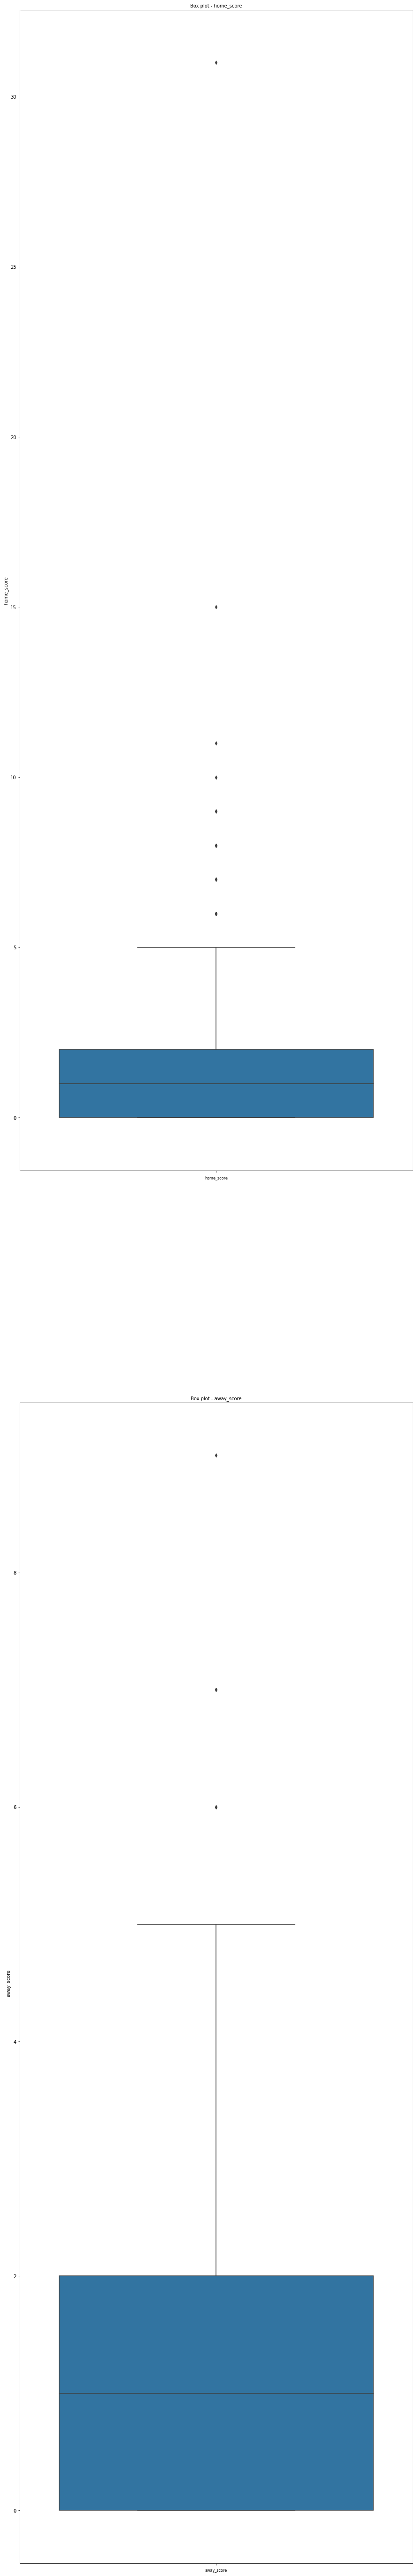

In [531]:
# Checking for Outliers
col_names = ['home_score',	'away_score']

fig, ax = plt.subplots(len(col_names), figsize=(15,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [532]:
# removing outlier for home_score
# Removing outliers
fifa = fifa[(np.abs(stats.zscore(fifa[['home_score', 'away_score']])) < 3).all(axis=1)]


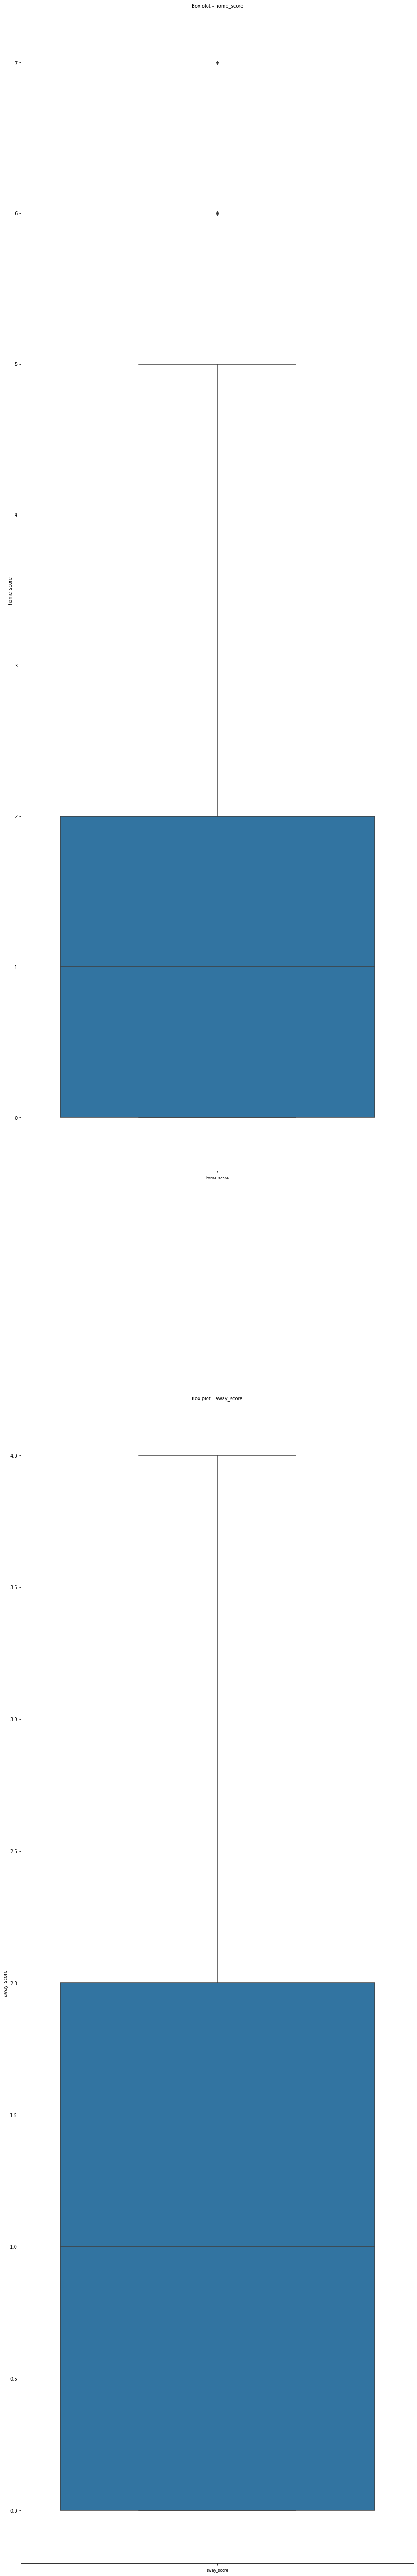

In [533]:
# Checking for Outliers
col_names = ['home_score',	'away_score']

fig, ax = plt.subplots(len(col_names), figsize=(15,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [534]:
#previewing the information of the dataset again
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 872
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          851 non-null    object 
 1   home_team                     851 non-null    object 
 2   away_team                     851 non-null    object 
 3   home_score                    851 non-null    int64  
 4   away_score                    851 non-null    int64  
 5   neutral                       851 non-null    bool   
 6   rank_home                     851 non-null    int64  
 7   home_total_points             851 non-null    float64
 8   home_previous_points          851 non-null    int64  
 9   home_rank_change              851 non-null    int64  
 10  home_cur_year_avg             851 non-null    float64
 11  home_cur_year_avg_weighted    851 non-null    float64
 12  home_last_year_avg            851 non-null    float64
 13  home_

the outliers have been removed. the initial entries were 873 and the remaining entries are 851

**Feature Selection** and **multicoliniality** 

In [535]:
#checking for correlation
fifa.corr()

,home_score,away_score,neutral,rank_home,home_total_points,home_previous_points,home_rank_change,home_cur_year_avg,home_cur_year_avg_weighted,home_last_year_avg,...,away_previous_points,away_rank_change,away_cur_year_avg,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted
home_score,1.000,-0.104,0.015,-0.087,0.060,0.025,0.065,0.057,0.057,0.056,...,-0.196,0.036,-0.043,-0.043,-0.037,-0.037,-0.023,-0.023,-0.024,-0.024
away_score,-0.104,1.000,0.058,0.091,-0.063,-0.092,-0.018,-0.057,-0.057,-0.058,...,0.086,0.023,-0.013,-0.013,-0.010,-0.010,-0.013,-0.013,-0.024,-0.024
neutral,0.015,0.058,1.000,0.030,0.025,0.044,-0.006,0.028,0.028,0.019,...,0.009,0.022,0.027,0.027,0.024,0.024,0.019,0.019,0.007,0.007
rank_home,-0.087,0.091,0.030,1.000,-0.061,-0.612,-0.050,-0.059,-0.059,-0.065,...,-0.320,0.035,0.021,0.021,0.037,0.037,0.019,0.019,0.039,0.039
home_total_points,0.060,-0.063,0.025,-0.061,1.000,0.199,-0.020,0.978,0.978,0.932,...,0.021,-0.016,0.743,0.743,0.772,0.772,0.776,0.776,0.761,0.761
home_previous_points,0.025,-0.092,0.044,-0.612,0.199,1.000,-0.026,0.192,0.192,0.197,...,0.669,-0.052,0.096,0.096,0.099,0.099,0.110,0.110,0.093,0.093
home_rank_change,0.065,-0.018,-0.006,-0.050,-0.020,-0.026,1.000,-0.015,-0.015,-0.027,...,0.003,0.066,-0.033,-0.033,-0.013,-0.013,-0.038,-0.038,-0.015,-0.015
home_cur_year_avg,0.057,-0.057,0.028,-0.059,0.978,0.192,-0.015,1.000,1.000,0.845,...,0.014,-0.023,0.716,0.716,0.744,0.744,0.745,0.745,0.739,0.739
home_cur_year_avg_weighted,0.057,-0.057,0.028,-0.059,0.978,0.192,-0.015,1.000,1.000,0.845,...,0.014,-0.023,0.716,0.716,0.744,0.744,0.745,0.745,0.739,0.739
home_last_year_avg,0.056,-0.058,0.019,-0.065,0.932,0.197,-0.027,0.845,0.845,1.000,...,0.035,-0.009,0.712,0.712,0.736,0.736,0.738,0.738,0.714,0.714


the following columns has a high correneality of 0.9 and above amongst each other:

set1 = ('home_previous_points','home_cur_year_avg', 'home_cur_year_avg_weighted','home_last_year_avg', 'home_last_year_avg_weighted','home_two_year_ago_avg', 'home_two_year_ago_weighted', 'home_three_year_ago_avg', 'home_three_year_ago_weighted') and set2 = ('away_previous_points',  'away_cur_year_avg', 'away_cur_year_avg_weighted', 'away_last_year_avg','away_last_year_avg_weighted', 'away_two_year_ago_avg','away_two_year_ago_weighted', 'away_three_year_ago_avg','away_three_year_ago_weighted') 

in set 1 all the columns will be dropped except home_previous_points and in set 2 all the columns will be dropped except away_previous_points.

In [536]:
#Dropping highly correlated columns
fifa=fifa.drop(columns=['home_cur_year_avg', 'home_cur_year_avg_weighted','home_last_year_avg', 'home_last_year_avg_weighted','home_two_year_ago_avg', 'home_two_year_ago_weighted', 'home_three_year_ago_avg', 'home_three_year_ago_weighted',
                         'away_cur_year_avg', 'away_cur_year_avg_weighted', 'away_last_year_avg','away_last_year_avg_weighted', 'away_two_year_ago_avg','away_two_year_ago_weighted', 'away_three_year_ago_avg','away_three_year_ago_weighted'])


In [537]:
#checking for correlation
corr=fifa.corr()
corr

,home_score,away_score,neutral,rank_home,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
home_score,1.000,-0.104,0.015,-0.087,0.060,0.025,0.065,0.273,-0.038,-0.196,0.036
away_score,-0.104,1.000,0.058,0.091,-0.063,-0.092,-0.018,-0.182,-0.014,0.086,0.023
neutral,0.015,0.058,1.000,0.030,0.025,0.044,-0.006,0.062,0.024,0.009,0.022
rank_home,-0.087,0.091,0.030,1.000,-0.061,-0.612,-0.050,0.537,0.027,-0.320,0.035
home_total_points,0.060,-0.063,0.025,-0.061,1.000,0.199,-0.020,0.093,0.790,0.021,-0.016
home_previous_points,0.025,-0.092,0.044,-0.612,0.199,1.000,-0.026,-0.283,0.103,0.669,-0.052
home_rank_change,0.065,-0.018,-0.006,-0.050,-0.020,-0.026,1.000,-0.003,-0.028,0.003,0.066
away_rank,0.273,-0.182,0.062,0.537,0.093,-0.283,-0.003,1.000,-0.028,-0.600,-0.026
away_total_points,-0.038,-0.014,0.024,0.027,0.790,0.103,-0.028,-0.028,1.000,0.124,0.024
away_previous_points,-0.196,0.086,0.009,-0.320,0.021,0.669,0.003,-0.600,0.124,1.000,-0.056


In [538]:
#Calculating VIF score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,home_score,away_score,neutral,rank_home,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
home_score,1.192,-0.007,-0.001,0.470,-0.073,0.141,-0.048,-0.570,0.067,-0.062,-0.070
away_score,-0.007,1.099,-0.080,-0.286,-0.028,0.024,0.008,0.384,0.053,0.021,-0.003
neutral,-0.001,-0.080,1.017,-0.036,0.026,-0.107,0.001,-0.088,-0.037,0.008,-0.025
rank_home,0.470,-0.286,-0.036,3.598,0.036,2.958,0.227,-2.663,-0.195,-2.296,-0.190
home_total_points,-0.073,-0.028,0.026,0.036,3.176,-0.899,-0.035,-0.174,-2.521,0.749,0.108
home_previous_points,0.141,0.024,-0.107,2.958,-0.899,4.721,0.275,-2.393,0.554,-3.682,-0.177
home_rank_change,-0.048,0.008,0.001,0.227,-0.035,0.275,1.028,-0.162,0.046,-0.231,-0.079
away_rank,-0.570,0.384,-0.088,-2.663,-0.174,-2.393,-0.162,3.704,0.185,2.823,0.240
away_total_points,0.067,0.053,-0.037,-0.195,-2.521,0.554,0.046,0.185,3.032,-0.642,-0.117
away_previous_points,-0.062,0.021,0.008,-2.296,0.749,-3.682,-0.231,2.823,-0.642,4.488,0.259


All the VIF scores are below 5 hence the data is fit for modeling

##7. Univariate Analysis

- Bar Charts
- Histograms
- pie chart

In [539]:
fifa.describe()

,home_score,away_score,rank_home,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
count,851.000,851.000,851.000,851.000,851.000,851.000,851.000,851.000,851.000,851.000
mean,1.516,0.948,64.584,38.472,466.617,-0.132,68.835,30.799,450.873,0.148
std,1.376,1.005,47.014,161.697,302.640,4.223,49.576,136.040,315.729,4.885
min,0.000,0.000,1.000,0.000,0.000,-22.000,1.000,0.000,0.000,-43.000
25%,0.000,0.000,26.000,0.000,234.000,-2.000,28.000,0.000,188.500,-1.000
50%,1.000,1.000,56.000,0.000,491.000,0.000,61.000,0.000,456.000,0.000
75%,2.000,2.000,94.500,0.000,654.500,1.000,101.000,0.000,630.500,1.000
max,7.000,4.000,201.000,1273.690,1683.000,30.000,209.000,1181.430,1883.000,34.000


**Description**

- mean:

home_score =1.516

away_score =0.948

- median

home_score=1.00

away_score=1.00

- standard deviation

home_score=1.376

away_score=1.005

- min and max

home_score=0.00,7.00

away_score=0.00,4.00



In [540]:
#sckewness
#Skewness for home_score
fifa['home_score'].skew(axis=0, skipna=True, level=None, numeric_only=None)

1.0967741675411726

In [541]:
#Skewness for away_score
fifa['away_score'].skew(axis=0, skipna=True, level=None, numeric_only=None)

0.9901951588077214

In [542]:
#Kurtosis
#kurtosis for home_score
fifa['home_score'].kurtosis(axis=0, skipna=True, level=None, numeric_only=None)

1.356186874927935

In [543]:
#kurtosis for away_score
fifa['away_score'].kurtosis(axis=0, skipna=True, level=None, numeric_only=None)

0.5106253949118313

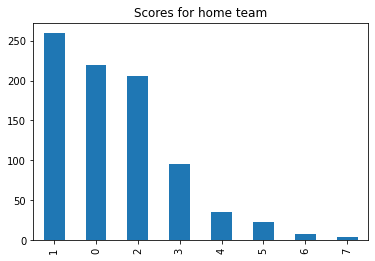

In [544]:
# Ploting the univariate summaries and recording our observations

#barchart for home_score
(fifa['home_score'].value_counts()).plot.bar(title='Scores for home team');


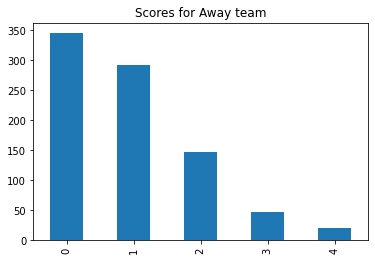

In [545]:
#barchart for away_score
(fifa['away_score'].value_counts()).plot.bar(title='Scores for Away team');

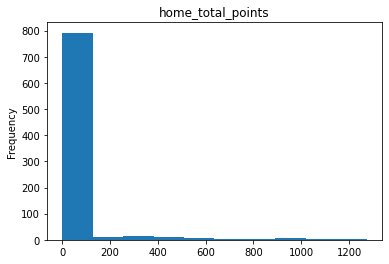

In [546]:
#Histograph for home_total_points
(fifa['home_total_points']).plot.hist(title='home_total_points');

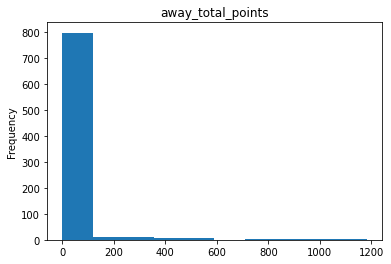

In [547]:
#Histograph for away_total_points
(fifa['away_total_points']).plot.hist(title='away_total_points');

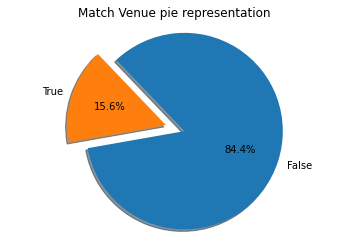

In [548]:
# Mtach location pie chart representation
match_venue = fifa['neutral'].value_counts()
explode = (0, 0.2)

# Plotting pie chart
plt.pie(match_venue, explode = explode, labels = match_venue.index, autopct = '%1.1f%%', shadow = True, startangle = 190)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Match Venue pie representation')

# Show plot
plt.show()

##8. Bivariate Analysis

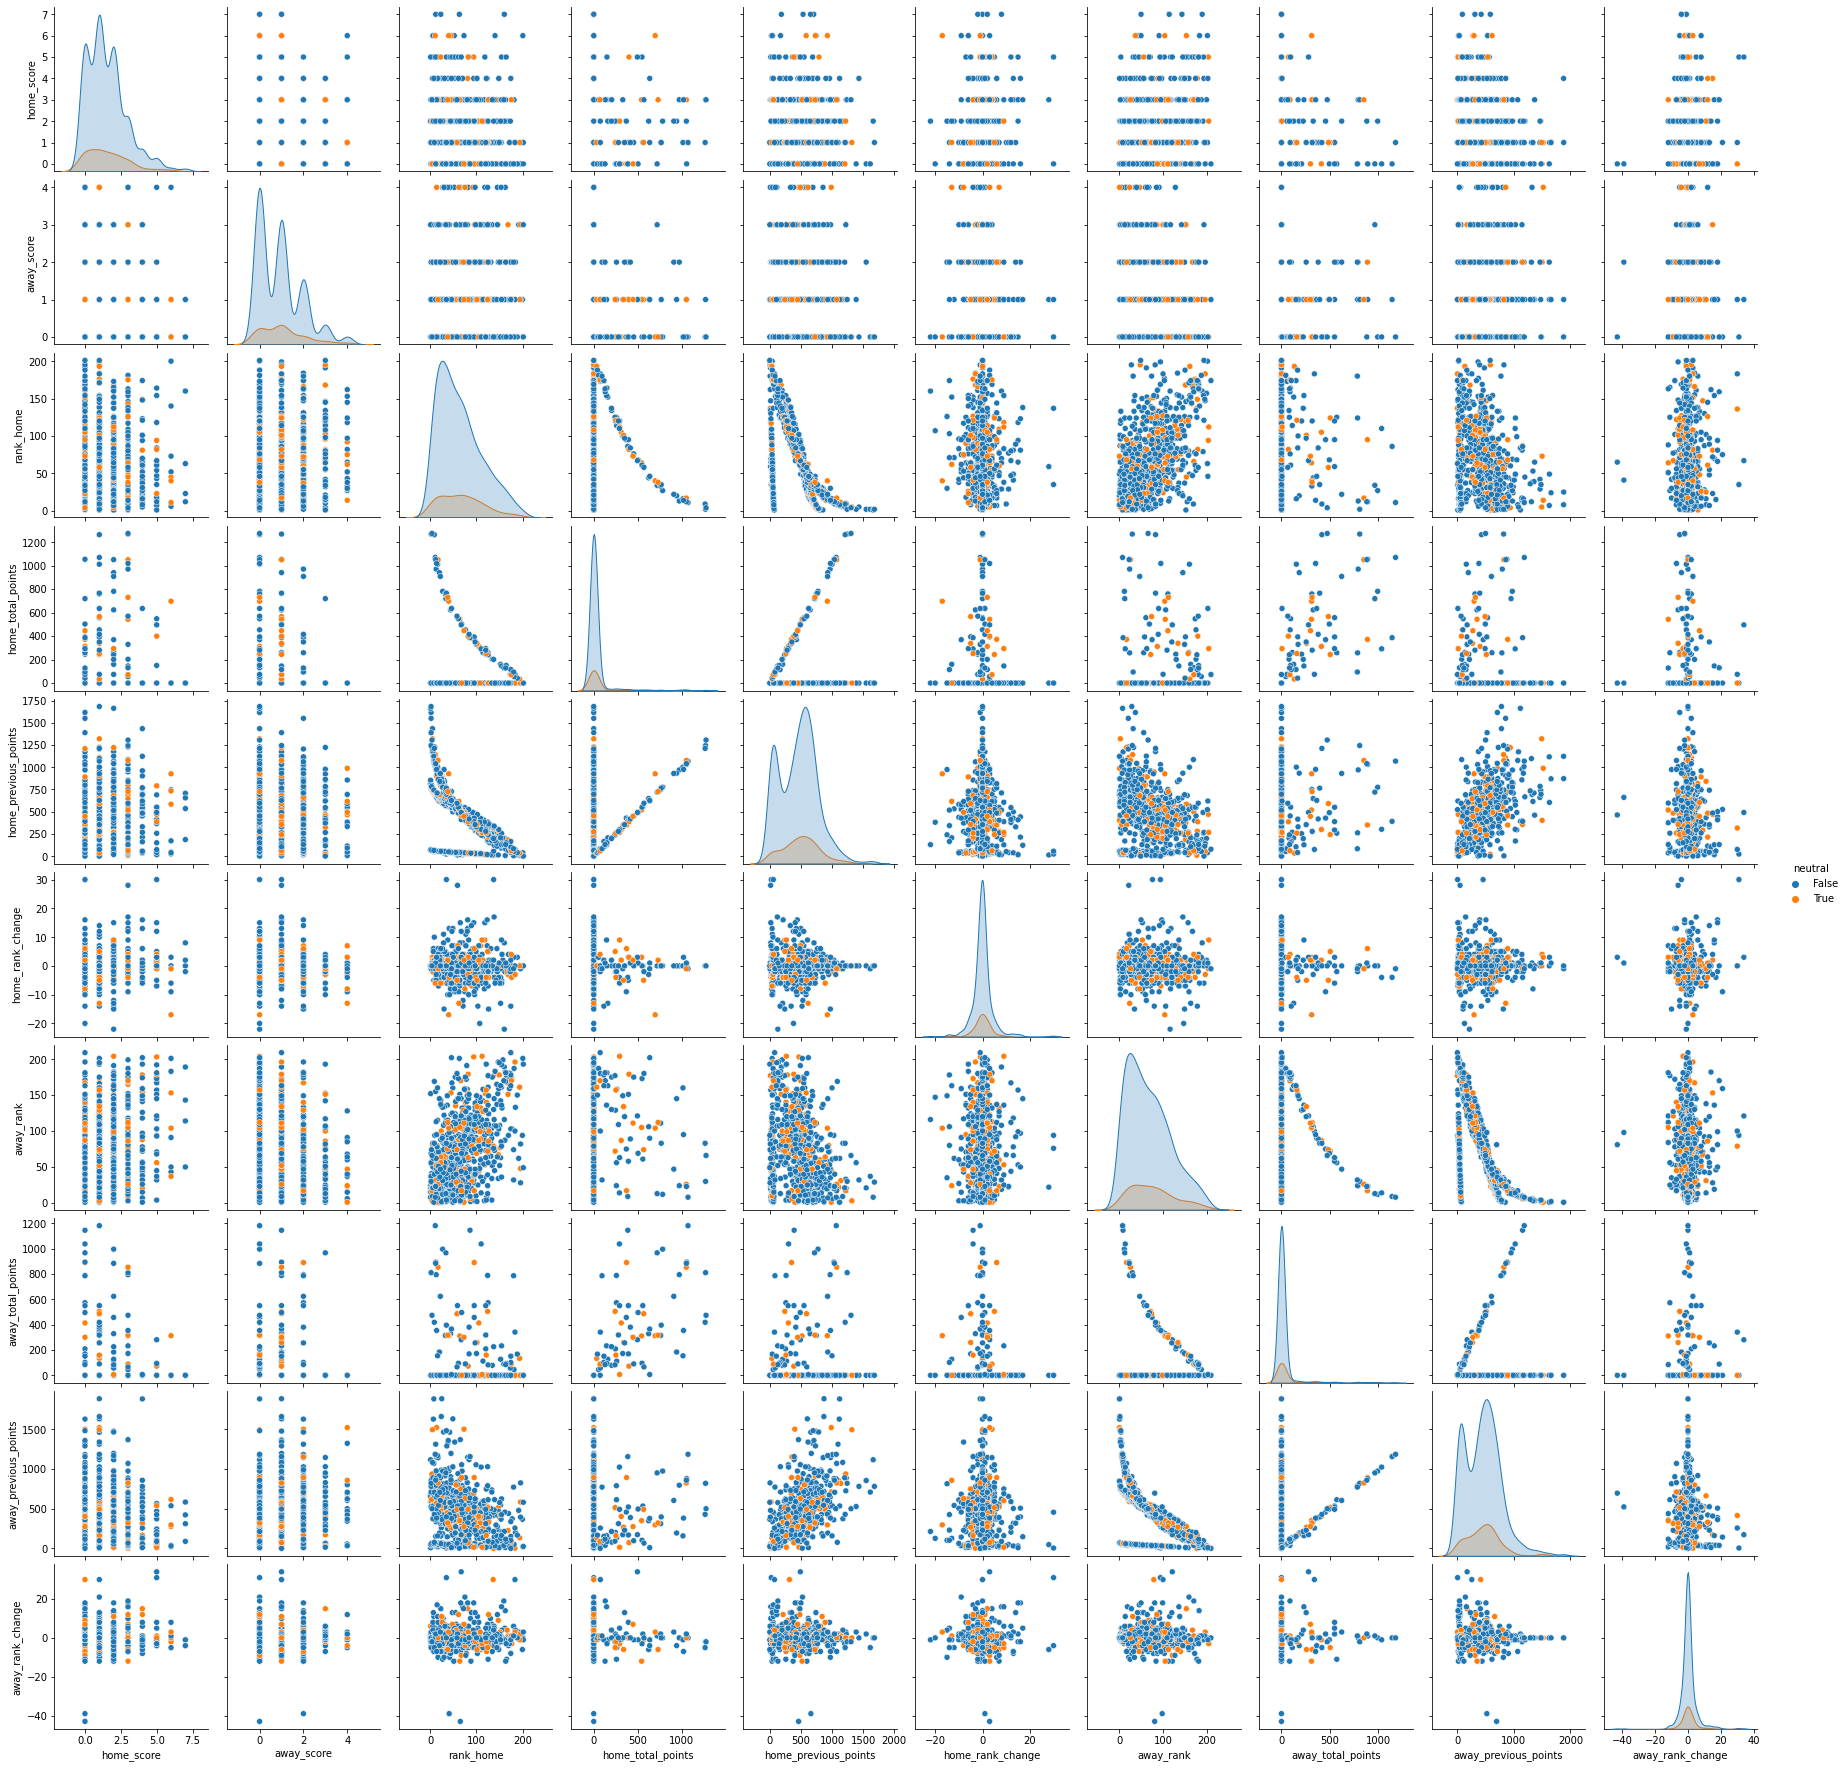

In [549]:
#pairplot
sns.pairplot(fifa,hue="neutral");

##9.Encoding Data

In [550]:
#creating an instance of labelencoder
labelencoder = LabelEncoder()
fifa['neutral']=labelencoder.fit_transform(fifa['neutral'])
fifa.head(5)

,date,home_team,away_team,home_score,away_score,neutral,rank_home,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
0,1993-08-08,Bolivia,Uruguay,3,1,0,59,0.000,13,28,22,0.000,47,-6
1,1993-08-08,Brazil,Mexico,1,1,0,8,0.000,55,-5,14,0.000,42,11
2,1993-08-08,Ecuador,Venezuela,5,0,0,35,0.000,23,30,94,0.000,4,31
3,1993-08-08,Guinea,Sierra Leone,1,0,0,65,0.000,23,-2,86,0.000,16,-7
4,1993-08-08,Paraguay,Argentina,1,3,0,67,0.000,22,1,5,0.000,51,5


##10. Multivariate Analysis

## Home team score

### 1). Linear regression analysis

In [551]:
#defining independent and dependent variable
X,y = fifa[['neutral',
       'rank_home', 'home_total_points', 'home_previous_points',
       'home_rank_change', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change']],fifa['home_score']

In [552]:
#dropping object anomaly
X = X.select_dtypes(exclude=['object'])


In [553]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [554]:
#training the algorithim
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [555]:
#  intercept
print(regressor.intercept_)

# slope
print(regressor.coef_)

1.526826057295002
[-0.06742774 -0.01127403  0.00052858 -0.00041851  0.0094402   0.01237252
 -0.00068944  0.00015367  0.01119064]


In [556]:
#making prediction
y_pred = regressor.predict(X_test)
#make the comparrision between the actual values and the predicted values
fifa1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
fifa1

,Actual,Predicted
684,1,1.396
342,2,2.026
558,1,1.582
861,1,2.031
696,3,1.847
...,...,...
157,2,1.867
729,2,1.308
637,0,1.449
50,3,2.771


In [557]:
#Evaluating the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9958363330614317
Mean Squared Error: 1.6646929314270498
Root Mean Squared Error: 1.2902297979147164


the RMSE is greater than 10% of the mean of home_score hence polynomial regression will be performed to evaluate the course of the innacuracy 

##2. Polynomial Regression


In [558]:
# Creates a polynomial regression model for the given degree
poly = PolynomialFeatures(degree=2, include_bias = False)
poly_features = poly.fit_transform(X)
   
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train,y_train)

LinearRegression()

In [559]:
#Testing the model
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test,poly_reg_y_predicted))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,poly_reg_y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,poly_reg_y_predicted))
print('Root Mean Squared Error:',poly_reg_rmse)


Mean Absolute Error: 0.9958363330614317
Mean Squared Error: 1.6646929314270498
Root Mean Squared Error: 1.2902297979147164


the RMSE is greater than 10% of the mean of home_score hence the model ovefitts the dataset hence more data is required to improve the accuracy

### 3.Cross Validate the model

In [560]:
X1,y = fifa[['neutral',
       'rank_home', 'home_total_points', 'home_previous_points',
       'home_rank_change', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change']],fifa['home_score']

#dropping object anomaly
X = X1.select_dtypes(exclude=['object'])
X = X.values
y=y.values

In [561]:
from sklearn.model_selection import KFold

# defining folds
folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.3813103283002859

Training model 2
Model 2 Root Mean Squared Error: 1.2899545892195268

Training model 3
Model 3 Root Mean Squared Error: 1.3565062854517582

Training model 4
Model 4 Root Mean Squared Error: 1.1102203843686207

Training model 5
Model 5 Root Mean Squared Error: 1.2744063191819124


the RMSe of the first and third model are higher than the RMSE that we got during polynomial regression. this indicates that further analysis needs to be done in order to improve the model

### 4.Residual plots and heteroskedasticity testing

**Residual Plot**

In [562]:
X2,y = fifa[['neutral',
       'rank_home', 'home_total_points', 'home_previous_points',
       'home_rank_change', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change']],fifa['home_score']

#dropping object anomaly
X = X2.select_dtypes(exclude=['object'])
X = X.values
y=y.values

X_train, X_test, home_train, home_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, home_train)

# This is our prediction for admission based on our model
home_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(home_predict, home_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.012501988628893033

the chances of home team to win are over estimated by 1.25%

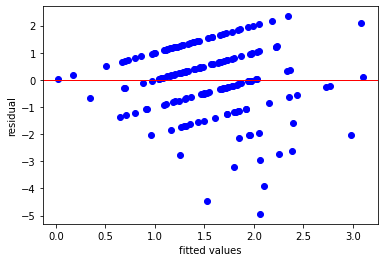

In [563]:
#Residual plot
plt.scatter(home_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

the residuals are centered around the mean which is close to 0.

**heteroskedasticity test**

In [564]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(home_predict, residuals)

# calculate critical value of the chi squared distribution
degree_of_freedom = len(home_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

#test whether variance is homogeneous across our dataset

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

3.690192300126875e-29
the variances are homogeneous!


## Away team score

### 1). Linear regression analysis

In [565]:
#defining independent and dependent variable
X,y = fifa[['neutral',
       'rank_home', 'home_total_points', 'home_previous_points',
       'home_rank_change', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change']],fifa['away_score']

In [566]:
#dropping object anomaly
X = X.select_dtypes(exclude=['object'])

In [567]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [568]:
#training the algorithim
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [569]:
#  intercept
print(regressor.intercept_)

1.1278879187682624


In [570]:
# slope
print(regressor.coef_)

[ 2.31297960e-01  5.35506546e-03  2.62973084e-04 -1.74675413e-04
 -5.66359728e-03 -6.95105630e-03 -4.37174904e-04 -3.68833351e-05
  2.55146930e-03]


In [571]:
#making prediction
y_pred = regressor.predict(X_test)
#make the comparrision between the actual values and the predicted values
fifa1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
fifa1.head()

,Actual,Predicted
684,3,0.869
342,2,0.549
558,1,0.751
861,1,0.618
696,0,0.565


In [572]:
#Evaluating the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7558363162760781
Mean Squared Error: 0.9664351313235714
Root Mean Squared Error: 0.9830743264492118


the RMSE is greater than 10% of the mean of home_score hence the model ovefitts the dataset hence more data is required to improve the accuracy

### 2. Polynomial Regression

In [573]:
# Creates a polynomial regression model for the given degree
poly = PolynomialFeatures(degree=2, include_bias = False)
poly_features = poly.fit_transform(X)
   
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train,y_train)

LinearRegression()

In [574]:
#Testing the model
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test,poly_reg_y_predicted))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,poly_reg_y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,poly_reg_y_predicted))
print('Root Mean Squared Error:',poly_reg_rmse)

Mean Absolute Error: 0.7558363162760781
Mean Squared Error: 0.9664351313235714
Root Mean Squared Error: 0.9830743264492118


the RMSE is greater than 10% of the mean of home_score hence the model ovefitts the dataset hence more data is required to improve the accuracy

### 3.Cross Validate the model

In [575]:
X3,y = fifa[['neutral',
       'rank_home', 'home_total_points', 'home_previous_points',
       'home_rank_change', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change']],fifa['away_score']

#dropping object anomaly
X = X3.select_dtypes(exclude=['object'])
X = X.values
y=y.values

In [576]:
from sklearn.model_selection import KFold

# defining folds
folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = []
count = 1
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.0779855977342274

Training model 2
Model 2 Root Mean Squared Error: 1.0100706817375888

Training model 3
Model 3 Root Mean Squared Error: 0.9622974383037599

Training model 4
Model 4 Root Mean Squared Error: 0.9482844166599207

Training model 5
Model 5 Root Mean Squared Error: 0.8661806067551183


the RMSe of the first and second model are higher than the RMSE that we got during polynomial regression. this indicates that further analysis needs to be done in order to improve the model

### 4.Residual plots and heteroskedasticity testing

**Residual plot**

In [577]:
X4,y = fifa[['neutral',
       'rank_home', 'home_total_points', 'home_previous_points',
       'home_rank_change', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change']],fifa['away_score']

#dropping object anomaly
X = X4.select_dtypes(exclude=['object'])
X = X.values
y=y.values

X_train, X_test, away_train, away_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, away_train)

# This is our prediction for admission based on our model
away_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(away_predict, away_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.08583361799421851

the chances of home team to win are over estimated by 8.58%

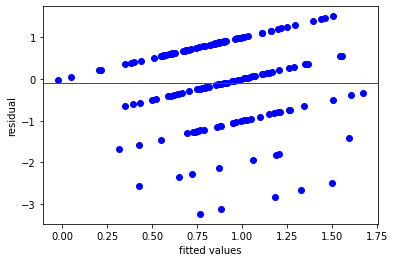

In [578]:
#Residual plot
plt.scatter(away_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

**heteroskedasticity test**

In [579]:

test_result, p_value = sp.stats.bartlett(home_predict, residuals)

# calculate critical value of the chi squared distribution
degree_of_freedom = len(away_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

#test whether variance is homogeneous across our dataset

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

7.430312510808321e-16
the variances are homogeneous!


##11.Logistic Regression



In [580]:
#Creating a performance column indicating win, loss or draw for the home team
conditions = [
    (fifa['home_score'] > fifa['away_score']),
    (fifa['home_score'] < fifa['away_score']),
    (fifa['home_score'] == fifa['away_score'])
    ]

#creating a list
values = ['win', 'loss', 'draw']

#creating a performance column
fifa['performance'] = np.select(conditions, values)



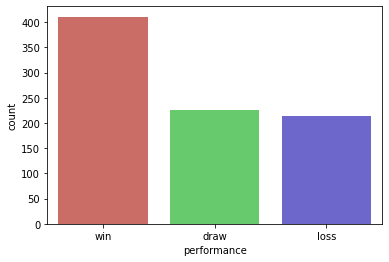

In [581]:
#plotting the countplot for performance of home team
sns.countplot(x='performance',data=fifa,palette='hls');

In [582]:
#Independent variables
X = fifa.drop([ 'home_score', 'away_score', 'performance','date','home_team', 'away_team'], axis=1)

# Target variable
y = fifa['performance']

# Train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [583]:
#dropping object anomaly
X = X.select_dtypes(exclude=['object'])

In [584]:
#Applying Feature scalling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [585]:
#creating the multinomial logistic regression model
regressor = LogisticRegression(random_state=0,multi_class='multinomial',solver='newton-cg').fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [586]:
#evaluating the score of the model
score = regressor.score(X_train, y_train)
print(score)

0.5367647058823529


In [587]:

# Creating a confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 3,  9, 27],
       [ 3, 19, 27],
       [ 2,  7, 74]])

the accuracy of the model was 53.67%

the outcomes from the logistic model was as follows:

- draw:Tp=3, tn=127, fp= 5, fn= 36,
- loss: Tp=74, tn=34 , fp= 54, fn= 10,
- win: Tp=19, tn=106 , fp= 16, fn= 30

In [588]:

# Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))  

#Create classification report
class_report=classification_report(y_test, y_pred)
print(class_report)

Accuracy Score: 0.5614035087719298
              precision    recall  f1-score   support

        draw       0.38      0.08      0.13        39
        loss       0.54      0.39      0.45        49
         win       0.58      0.89      0.70        83

    accuracy                           0.56       171
   macro avg       0.50      0.45      0.43       171
weighted avg       0.52      0.56      0.50       171



##12. Challenging the logistic regressor classifier using Random forest classification

In [589]:
#Independent variables
X = fifa.drop([ 'home_score', 'away_score', 'performance','date','home_team', 'away_team'], axis=1)

# Target variable
y = fifa['performance']

# Train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [590]:

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [591]:
#random forest classifier
rfc = RandomForestClassifier()
# Initiate classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
print(accuracy_score(y_test, y_pred))

0.5263157894736842


In [592]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[14  5 20]
 [12 19 18]
 [10 16 57]]


In [593]:

# printing out classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        draw       0.39      0.36      0.37        39
        loss       0.47      0.39      0.43        49
         win       0.60      0.69      0.64        83

    accuracy                           0.53       171
   macro avg       0.49      0.48      0.48       171
weighted avg       0.52      0.53      0.52       171



the accuracy score for random forest is 51.46% hence the regressor model is the best since it has the accuracy score of 53.67%
